<a href="https://colab.research.google.com/github/robbi621/temu_kembali_citra/blob/main/image_processing/ip_adapative_thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:

# import the necessary packages
import matplotlib.pyplot as plt
import cv2

In [8]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [9]:
cd drive/MyDrive/

/content/drive/MyDrive


In [10]:
ls

 00_002.png
 0B6904A1-A7C3-46F8-A1DC-94D57735CDC0.png
'126409_18900_Format Laporan Praktikum.docx'
'126409_18900_Format Laporan Praktikum.gdoc'
 18D7648C-AAAF-43FC-939D-4D165B35CCC9.png
 1909.03975.gdoc
 1909.03975.pdf
 1C3AAED1-9D9D-4821-9910-039E16CEDB87.png
'201810370311036-robbi adam.pdf'
 20210605-173655-768.mp4
 20210613-195248-010.mp4
 2103.00266.gdoc
 2103.00266.pdf
 2106.12569.gdoc
 2106.12569.pdf
 2107.03820.gdoc
 2107.03820.pdf
'2107.11611 - Copy.gdoc'
'2107.11611 - Copy.pdf'
'2107.11737 - Copy.gdoc'
'2107.11737 - Copy.pdf'
 322226F3-B689-4BE7-A3DB-3B1B7C8FD252.png
'3 PERNIKAHAN.ppt'
 45546B78-3C3D-4530-953D-BAF4734F89E5.png
 49171ECE-816D-43D9-941F-67F83BB32EC1.png
 578ECA80-017F-4269-A6FC-2EA30D6067D7.png
 70094E0A-EE90-40D1-95F7-69F8E9A6B83E.png
 742C62AA-6D31-4616-9D68-FF568EBC2E5A.png
 9E0E776D-A5FA-4D9D-8E65-FB0C0AF7E267.png
'ABDI ZAKI_A_UAS'/
'AIK tugas 1 robbi adam raditya 2018-036.docx'
'akhlak dalam keluarga_2018-036.pdf'
'akhlak dalam keluarga 2 _2018-036.pdf'
'ak

In [11]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "/content/drive/MyDrive/TKC/0001.png"
}

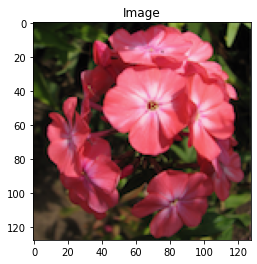

In [12]:
# load the image and display it
image = cv2.imread(args["image"])
plt_imshow("Image", image)

# convert the image to grayscale and blur it slightly
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

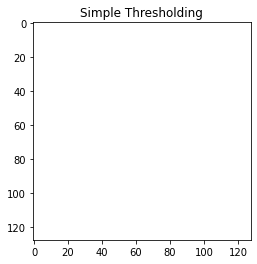

In [13]:
# apply simple thresholding with a hardcoded threshold value
(T, threshInv) = cv2.threshold(blurred, 230, 255,
	cv2.THRESH_BINARY_INV)
plt_imshow("Simple Thresholding", threshInv)

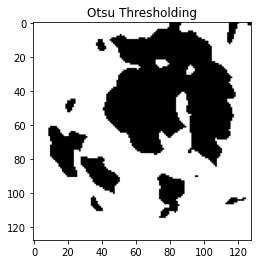

In [14]:
# apply Otsu's automatic thresholding
(T, threshInv) = cv2.threshold(blurred, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt_imshow("Otsu Thresholding", threshInv)

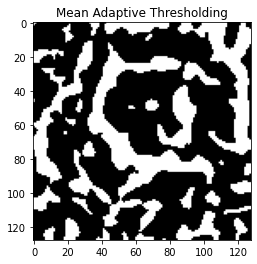

In [15]:
# instead of manually specifying the threshold value, we can use
# adaptive thresholding to examine neighborhoods of pixels and
# adaptively threshold each neighborhood
thresh = cv2.adaptiveThreshold(blurred, 255,
	cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 10)
plt_imshow("Mean Adaptive Thresholding", thresh)

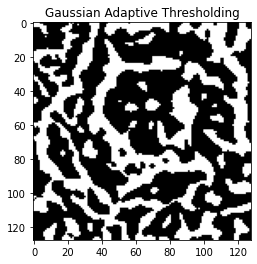

In [16]:
# perform adaptive thresholding again, this time using a Gaussian
# weighting versus a simple mean to compute our local threshold
# value
thresh = cv2.adaptiveThreshold(blurred, 255,
	cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 4)
plt_imshow("Gaussian Adaptive Thresholding", thresh)